Data Understanding and Exploration


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [4]:
df = pd.read_csv('/Bondora_raw.zip')

<ipython-input-4-64a86fe54650>:1: DtypeWarning: Columns (34,37,38,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Bondora_raw.zip')


Explore the data



In [5]:

print(df.head())




  ReportAsOfEOD                                LoanId  LoanNumber  \
0    2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1    2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2    2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3    2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4    2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   

           ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  2009-06-11 16:40:39  2009-06-11 16:40:39                     0        0   
1  2009-06-10 15:48:57  2009-06-10 15:48:57                     0        0   
2  2009-06-05 19:12:29  2009-06-05 19:12:29                     0        0   
3  2009-06-13 12:01:20  2009-06-13 12:01:20                     0        0   
4  2009-06-10 10:17:13  2009-06-10 10:17:13                     0        0   

   BidsManual  UserName  NewCreditCustomer  ...  \
0    115.0410      KARU               True  ...   
1    140.6057 

In [6]:
print(df.describe())


         LoanNumber  BidsPortfolioManager        BidsApi     BidsManual  \
count  1.345290e+05         134529.000000  134529.000000  134529.000000   
mean   9.449392e+05            966.452876      29.111664     559.332590   
std    4.786738e+05           1355.686016     150.159148     750.360512   
min    3.700000e+01              0.000000       0.000000       0.000000   
25%    6.206790e+05            155.000000       0.000000      96.000000   
50%    9.235970e+05            465.000000       0.000000     317.000000   
75%    1.311025e+06           1218.000000       5.000000     729.000000   
max    1.855339e+06          10625.000000    7570.000000   10630.000000   

       ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
count          134529.000000             134529.000000     134484.000000   
mean               13.374640                  3.907908          2.817257   
std                 4.992375                  1.726192          1.407908   
min                 

In [47]:
# Check for missing values
print(df.isnull().sum())


ReportAsOfEOD                              0
LoanId                                     0
LoanNumber                                 0
ListedOnUTC                                0
BiddingStartedOn                           0
                                       ...  
NrOfScheduledPayments                  36741
ReScheduledOn                          94207
PrincipalDebtServicingCost             75400
InterestAndPenaltyDebtServicingCost    75400
ActiveLateLastPaymentCategory          82279
Length: 112, dtype: int64


In [48]:
# Drop rows with missing values
data = df.dropna()

 Data Cleaning and Preprocessing


In [7]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

Handle missing values


In [10]:
# Calculate the correlation matrix
corr_matrix = df.corr()

<ipython-input-10-b5ae51ccccb4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

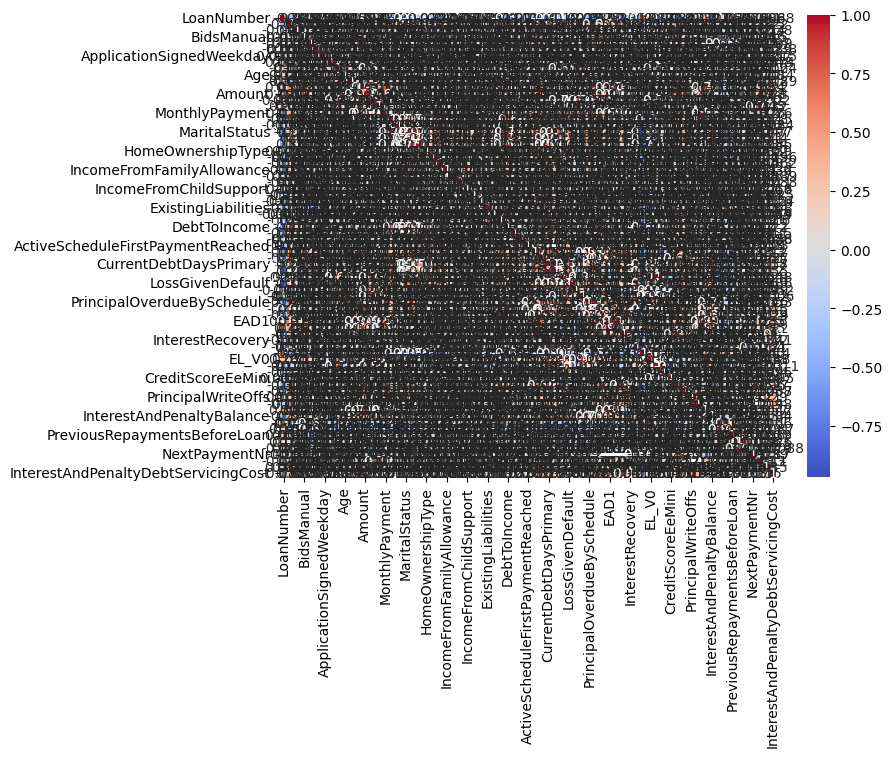

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

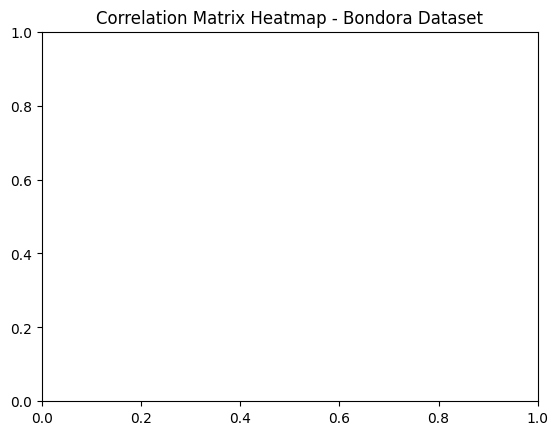

In [16]:
selected_features = ['Education', 'Amount', 'Age', 'NextPaymentNr', 'LoanNumber']
df_selected = df[selected_features]
plt.title('Correlation Matrix Heatmap - Bondora Dataset')
plt.show()

Feature Extraction

In [49]:
# Extract date features
data['Amount'] = pd.to_datetime(data['Amount'])
data['Age'] = data['Amount'].dt.year
data['Education'] = data['Amount'].dt.month

# Create lagged features
data['MaritalStatus'] = data['NextPaymentNr'].shift(1)

# Statistical aggregations
data['NextPaymentNr_Mean'] = data.groupby('Amount')['NextPaymentNr'].transform('mean')


Feature Encoding

In [50]:
# Label encoding (convert categorical to numeric)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Amount_Encoded'] = le.fit_transform(data['Amount'])

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical features
data['Age_Encoded'] = le.fit_transform(data['Age'])
data['MaritalStatus_Encoded'] = le.fit_transform(data['MaritalStatus'])

# Step 3: Save the updated dataset
data.to_csv('/Bondora_raw.zip', index=False)


In [40]:
#outliers detection
max_thresold = df['Amount'].quantile(0.99)
max_thresold

10630.0

In [42]:

df[df['Amount']>max_thresold]


,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
103533,2020-01-27,711F8D52-8BAD-4EBE-8157-AAC300E266C7,1434831,2019-09-09 10:45:17,2019-09-09 13:45:17,504,40,326.0,BO5K6AKA3,False,...,0,NaN,NaN,2020-02-18,6.0,60.0,2019-09-09,NaN,NaN,NaN
104035,2020-01-27,D868534E-1FF1-461A-A8A2-AAC501034F6B,1441808,2019-09-11 12:46:25,2019-09-11 15:46:25,65,0,614.0,BO6267366,False,...,0,NaN,NaN,2020-02-11,5.0,60.0,NaN,NaN,NaN,NaN
104492,2020-01-27,0CDD7DA5-9C1B-44C9-B4C1-AAC7010E58BE,1451793,2019-09-13 13:31:35,2019-09-13 16:31:35,1355,1000,1006.0,BO25759KA,False,...,1,NaN,NaN,2020-02-04,5.0,60.0,NaN,NaN,NaN,16-30
104644,2020-01-27,73B45585-CC8A-4B26-8015-AAC800DAAFE6,1453970,2019-09-14 10:17:05,2019-09-14 13:17:05,199,0,412.0,BO3249173,False,...,0,NaN,NaN,2020-02-17,5.0,60.0,NaN,NaN,NaN,NaN
104994,2020-01-27,6F8278F6-245C-40E6-B151-AABE00C7F75C,1417191,2019-09-04 11:44:08,2019-09-04 14:44:08,629,0,270.0,BOK9A4K66,False,...,0,2020-02-17,2020-05-15,2020-02-17,1.0,51.0,2020-01-20,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132534,2020-01-27,BE94E3B3-0D3B-47B1-8BB7-AB4C0014D7C8,1847171,2020-01-24 20:04:02,2020-01-24 22:04:02,2258,0,816.0,argoe86,False,...,0,NaN,NaN,2020-02-06,1.0,60.0,NaN,NaN,NaN,NaN
132841,2020-01-27,68F8EC63-26DD-4408-BEAA-AB4100C8218D,1813190,2020-01-13 10:28:06,2020-01-13 12:28:06,402,0,937.0,BO67491A3,False,...,0,NaN,NaN,2020-02-10,1.0,60.0,NaN,NaN,NaN,NaN
132852,2020-01-27,D931FF92-5ADF-4B1A-ABC1-AB4100DC2E80,1813423,2020-01-13 12:13:20,2020-01-13 14:13:20,232,15,924.0,BO12577A1,False,...,0,NaN,NaN,2020-02-10,1.0,60.0,NaN,NaN,NaN,NaN
133057,2020-01-27,FA40ED9F-9F94-4141-A335-AB430134D11B,1821302,2020-01-15 16:48:37,2020-01-15 18:48:37,494,5,1205.0,BOA77A5A3,False,...,0,NaN,NaN,2020-02-11,1.0,60.0,NaN,NaN,NaN,NaN


In [43]:
min_thresold = df['Amount'].quantile(0.01)
min_thresold

300.0

In [44]:
df[df['Amount']<min_thresold]




,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
6,2020-01-27,1A8651C1-4CC8-4500-B88F-9C2300A2DA91,649,2009-06-09 09:52:55,2009-06-09 09:52:55,0,0,191.7350,Elvi Mägi,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,53.97,180+
7,2020-01-27,6C1252F6-32AC-4572-A41B-9C4B0128AF3D,824,2009-07-19 18:00:11,2009-07-19 18:00:11,0,0,31.9558,Margaret,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40844,2020-01-27,5DFFED2D-05C0-4757-BF5C-A20600D3FD1B,33015,2013-07-25 12:51:49,2013-07-25 12:51:49,25,0,175.0000,Jetsu31,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
40933,2020-01-27,973A82F8-69CF-45A3-B2FC-A23000BC7043,43894,2013-09-05 11:26:05,2013-09-05 11:26:05,110,0,40.0000,apollo1961,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
40964,2020-01-27,C5FF2F77-7D25-4314-AEC2-A22500E6E706,38905,2013-08-25 14:00:41,2013-08-25 14:00:41,200,0,0.0000,BO115661,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
41004,2020-01-27,99D3D833-CFCA-4C77-829D-A23D00A5D616,48298,2013-09-18 10:03:47,2013-09-18 10:03:47,200,0,0.0000,BO121131,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN


Remove outliers


In [45]:
df[(df['Amount']<max_thresold) & (df['Amount']>min_thresold)]

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,180+
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,180+
5,2020-01-27,621EEF09-2715-49CD-9C88-9C1F01231EAF,640,2009-06-05 17:39:56,2009-06-05 17:39:56,0,0,300.3845,lauri430,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
9,2020-01-27,1FD1C7F9-2391-442C-80F0-9C4D0116C4A8,832,2009-07-21 16:54:57,2009-07-21 16:54:57,0,0,319.5581,Elleriin,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
10,2020-01-27,4D57C13A-31C1-4BB7-A073-9C4900C506DB,819,2009-07-17 11:57:21,2009-07-17 11:57:21,0,0,319.5581,zaitsiki,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2020-01-27,A9C9EF0F-4E79-4930-BA8A-A4130077FCC2,283484,2015-01-02 16:31:36,2015-01-02 16:31:36,2515,0,485.0000,BO73K5A6A,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1040.06,180+
134525,2020-01-27,787345C2-7606-4F72-8FE2-A4170082D77C,285168,2015-01-05 16:14:26,2015-01-05 16:14:26,1880,0,1120.0000,BO311A49,False,...,0,2017-06-27,2018-06-20,NaN,NaN,NaN,NaN,0.0,0.00,NaN
134526,2020-01-27,E2D3384D-289A-4B4D-A2DA-A40F00F7C755,281602,2015-01-02 14:04:27,2015-01-02 14:04:27,1975,0,525.0000,BO41K639A,True,...,0,NaN,NaN,NaN,0.0,60.0,NaN,0.0,1051.85,8-15
134527,2020-01-27,7CC7AB74-995B-4467-958A-A41700F78D59,285431,2015-01-05 16:56:12,2015-01-05 16:56:12,1840,0,1160.0000,BO45A925,False,...,0,2016-04-01,2016-10-03,NaN,NaN,NaN,NaN,0.0,889.50,31-60


Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

# Handle missing values
data = data.dropna()

# Feature scaling

scaler = StandardScaler()

# Check if 'LoanNumber' column contains any non-null values
if data['LoanNumber'].notnull().any():
    data['LoanNumber_Scaled'] = scaler.fit_transform(data[['LoanNumber']])

# Check if 'BidsManual' column contains any non-null values
if data['BidsManual'].notnull().any():
    data['BidsManual_Scaled'] = scaler.fit_transform(data[['BidsManual']])

# Save the updated dataset
data.to_csv('/Bondora_raw.zip', index=False)


In [52]:
#Save the processed dataset
data.to_csv('processed_dataset.csv', index=False)